In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from tqdm import tqdm_notebook

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('cat_dog_df.csv')

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df.type)

def df_to_data(df, picsize):
    img_ls = []
    label_ls = []

    for file_name, label in tqdm_notebook(zip(df.file_name, df.type)):
        img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (picsize, picsize))
        img_ls.append(img)
        
        onehot = np.zeros(2)  
        onehot[label] = 1
        label_ls.append(onehot)

    x_data = np.array(img_ls).reshape(len(df), -1)  # flatten image data
    x_data = x_data / 255.  # normalization
    y_data = np.array(label_ls)
    return x_data, y_data

In [3]:
picsize = 64
X_train, y_train = df_to_data(train_df, picsize)
X_test, y_test = df_to_data(test_df, picsize)

print('size of training data:', X_train.shape, y_train.shape)
print('size of testing data:', X_test.shape, y_test.shape)


size of training data: (20000, 4096) (20000, 2)
size of testing data: (5000, 4096) (5000, 2)


In [4]:
from tensorflow.keras.layers import Dense

In [11]:
model = tf.keras.Sequential()
model.add(Dense(256, activation='relu', input_shape=(4096,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax')) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 1,090,114
Trainable params: 1,090,114
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
batch_size = 32
epochs = 40
lr = 0.01
train_ratio = 0.9

In [14]:
model_history = model.fit(x=X_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_split=1 - train_ratio)

Train on 18000 samples, validate on 2000 samples
Epoch 1/40
18000/18000 [==============================] - 3s 192us/step - loss: 0.6971 - acc: 0.5607 - val_loss: 0.6679 - val_acc: 0.5910
Epoch 2/40
18000/18000 [==============================] - 2s 120us/step - loss: 0.6742 - acc: 0.5828 - val_loss: 0.6736 - val_acc: 0.5745
Epoch 3/40
18000/18000 [==============================] - 2s 128us/step - loss: 0.6662 - acc: 0.5942 - val_loss: 0.6643 - val_acc: 0.5980
Epoch 4/40
18000/18000 [==============================] - 2s 117us/step - loss: 0.6605 - acc: 0.6021 - val_loss: 0.6771 - val_acc: 0.5725
Epoch 5/40
18000/18000 [==============================] - 2s 117us/step - loss: 0.6599 - acc: 0.6053 - val_loss: 0.6585 - val_acc: 0.6045
Epoch 6/40
18000/18000 [==============================] - 2s 125us/step - loss: 0.6566 - acc: 0.6129 - val_loss: 0.6656 - val_acc: 0.6075
Epoch 7/40
18000/18000 [==============================] - 2s 124us/step - loss: 0.6549 - acc: 0.6111 - val_loss: 0.6607 - v

In [15]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

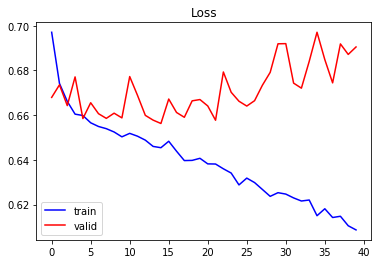

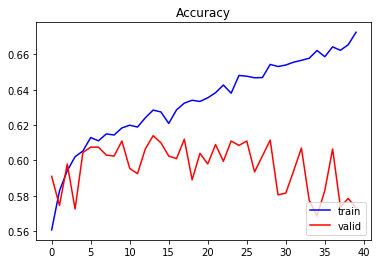

In [16]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

In [21]:
y_predict = model.predict_classes(X_test)
y_test_label = np.argmax(y_test, axis=1)

In [22]:
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.5738


In [23]:
tf.global_variables()

[<tf.Variable 'dense/kernel:0' shape=(64, 25) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(25,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(25, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(64, 256) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(256, 128) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_4/kernel:0' shape=(128, 64) dtype=float32>,
 <tf.Variable 'dense_4/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'dense_5/kernel:0' shape=(64, 2) dtype=float32>,
 <tf.Variable 'dense_5/bias:0' shape=(2,) dtype=float32>,
 <tf.Variable 'Adam/iterations:0' shape=() dtype=int64>,
 <tf.Variable 'Adam/lr:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_1:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_2:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/decay:0' shape=() dtype=

In [24]:
# save model
model.save('./keras_model/my_model.h5')

# load model
another_model = tf.keras.models.load_model('./keras_model/my_model.h5')

In [26]:
y_predict = another_model.predict_classes(X_test)
y_test_label = np.argmax(y_test, axis=1)
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.5738
